# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, maybe 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt'
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, wathc for KDE bandwidth
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/luogang/dat.txt"  # 
# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 may be corrupted, before is better
# ipath= "./data/NCDC/cn/tianjing/dat.txt"  
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # could apply width/length constrain
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) ")
df.index= df['date']

In [4]:
# Turn dir into [0,360), some station are[10,360],some are [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360) 
df['dir_windrose'] = df['dir']
# Convert windrose coordianates to Polar Cooridinates 
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,1.551120e+05,155112.000000,155112.000000,155112.000000,155112.000000
mean,2.005449e+07,1133.827170,176.534285,4.176262,191.723490
std,6.944657e+04,692.935463,93.961552,2.356673,102.936667
min,1.990072e+07,0.000000,0.000000,0.000000,0.000000
25%,2.002053e+07,600.000000,100.000000,2.500000,110.000000
50%,2.006122e+07,1100.000000,180.000000,3.600000,190.000000
75%,2.011071e+07,1700.000000,270.000000,5.600000,280.000000
max,2.015123e+07,2300.000000,350.000000,19.500000,350.000000


True


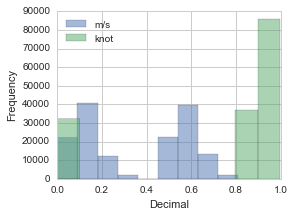

In [5]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt_configure('Decimal','Frequency')
    plt.legend(loc='best')

print knot_unit

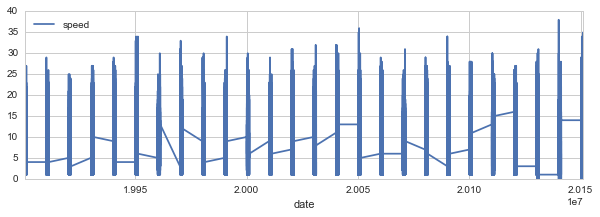

In [6]:
df['speed'].plot(legend=True,figsize=(10,3), grid=True)

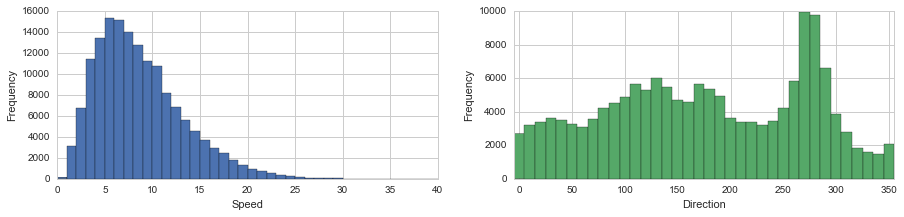

In [7]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df.speed, df.dir)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [8]:
display(df.query('dir % 10 >= 0.1'))
df = df.query('dir % 10 <= 0.1')

,date,HrMn,type,dir,speed,dir_windrose,decimal
date,,,,,,,
20150822,20150822,600,FM-12,35,11,55,0.885532
20150822,20150822,1800,FM-12,108,8,342,0.164149
20150826,20150826,1500,FM-12,267,8,183,0.358534
20150826,20150826,1800,FM-12,261,5,189,0.442766
20150901,20150901,1500,FM-12,261,4,189,0.276459
20150905,20150905,1200,FM-12,11,8,79,0.969764
20150909,20150909,1500,FM-12,54,8,36,0.164149
20150913,20150913,1500,FM-12,251,6,199,0.025920
20150916,20150916,1500,FM-12,135,4,315,0.082075


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20140116,20140116,900,SAO,110,38,340,0.904978,4.0,15.0
20140116,20140116,1100,SAO,110,37,340,0.933055,14.0,1.0
20140116,20140116,700,SAO,110,37,340,0.933055,4.0,3.0
20050522,20050522,500,SAO,140,36,310,0.961132,0.0,5.0
20050522,20050522,400,SAO,150,36,300,0.961132,9.0,0.0
20140116,20140116,1200,FM-12,100,36,350,0.961132,-1.0,13.0
20140116,20140116,400,SAO,130,35,320,0.989210,6.0,2.0
20151118,20151118,2200,SAO,130,35,320,0.989210,5.0,5.0
20050310,20050310,1100,SAO,110,35,340,0.989210,4.0,3.0


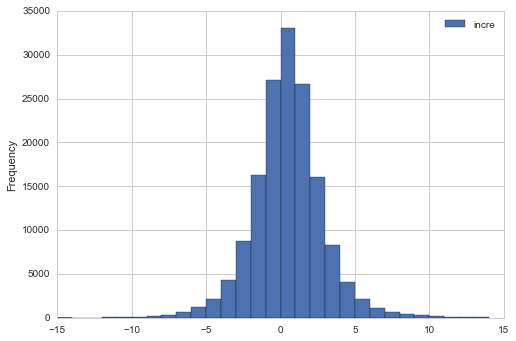

In [9]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True)

In [10]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 1


After Simple Aretefacts Handling

In [11]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20140116,20140116,900,SAO,110,38,340,0.904978,4.0,15.0
20140116,20140116,1100,SAO,110,37,340,0.933055,14.0,1.0
20140116,20140116,700,SAO,110,37,340,0.933055,4.0,3.0
20050522,20050522,500,SAO,140,36,310,0.961132,0.0,5.0
20140116,20140116,1200,FM-12,100,36,350,0.961132,-1.0,13.0
20050522,20050522,400,SAO,150,36,300,0.961132,9.0,0.0
20151118,20151118,2200,SAO,130,35,320,0.989210,5.0,5.0
20050310,20050310,1100,SAO,110,35,340,0.989210,4.0,3.0
20140116,20140116,400,SAO,130,35,320,0.989210,6.0,2.0


#### 1.3.1.3 re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [12]:
df['dir'].value_counts().sort_index()

0      2700
10     3206
20     3418
30     3656
40     3498
50     3262
60     3115
70     3591
80     4204
90     4553
100    4858
110    5666
120    5276
130    6023
140    5510
150    4728
160    4560
170    5637
180    5361
190    4947
200    3653
210    3418
220    3405
230    3242
240    3439
250    4228
260    5816
270    9955
280    9776
290    6643
300    3869
310    2785
320    1830
330    1596
340    1502
350    2104
Name: dir, dtype: int64

In [13]:
effective_column = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_column) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_column.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

SECTOR_LENGTH = 360/len(effective_column)
print len(effective_column), SECTOR_LENGTH

36 10.0


### 1.3.2 Sampling Type Selection

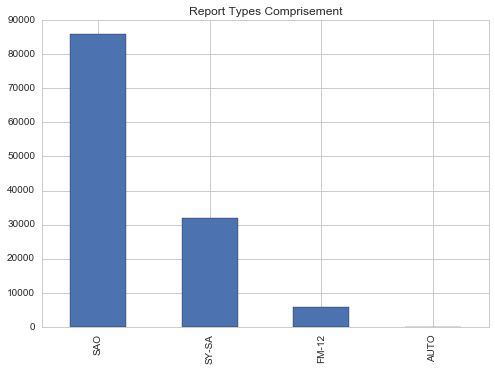

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

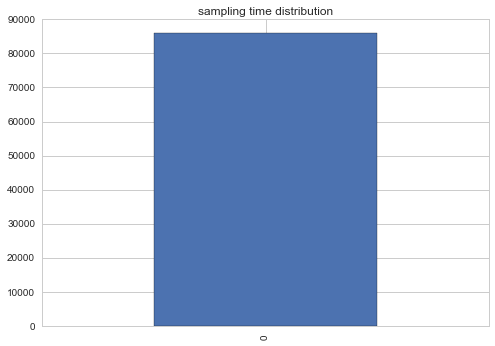

In [15]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [16]:
df['HrMn'].value_counts().sort_index()

0       1444
100     5944
200     5976
300     1819
400     5991
500     5998
600     1418
700     5982
800     6008
900     1861
1000    6033
1100    6005
1200    1485
1300    5996
1400    5971
1500    1862
1600    5981
1700    5971
1800    1437
1900    5960
2000    5983
2100    1847
2200    5969
2300    5959
Name: HrMn, dtype: int64

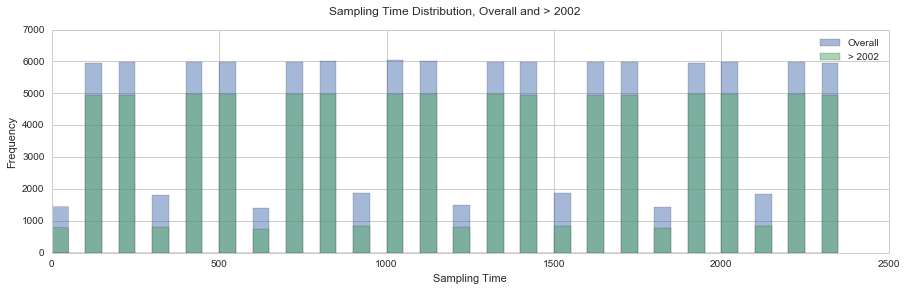

In [17]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend='best',
             title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

### 1.3.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [18]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5, label='Original Data')
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 4), label='Redistributed Data')
    plt_configure(xlabel="Direction", ylabel="Frequency", legend=True)
    plt.autoscale(enable=True, axis='x', tight=True)
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

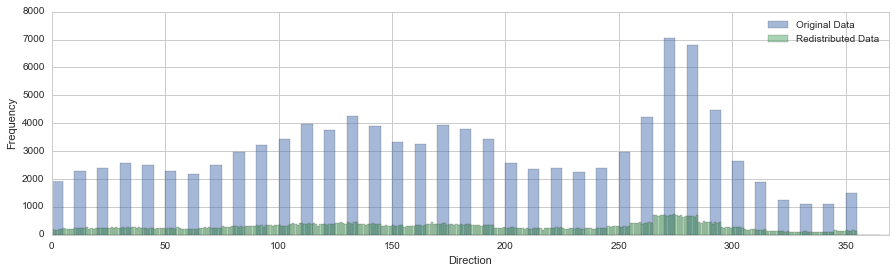

In [19]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [20]:
def randomize_speed(df):
    # Round down speed, need more caution
    if len(df.query('speed < 1')) > 200:
        # if has zero data
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(0,1)))
    else:
        # if lack zero
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Original Data')
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5,figsize=(15, 4), label='Redistributed Data')
    plt_configure(xlabel="Speed", ylabel="Frequency", legend=True)
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

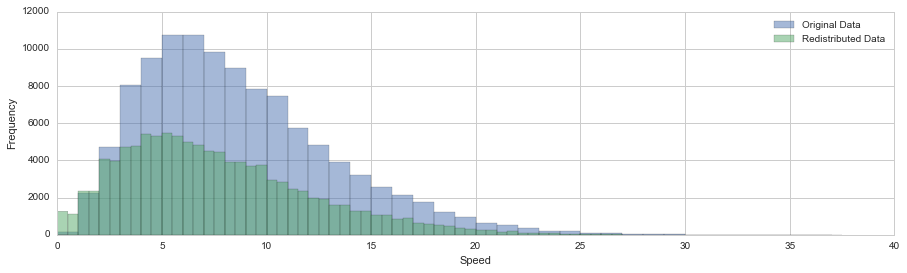

In [21]:
# Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df = randomize_speed(df)

### 1.3.5 Generate (x,y) from (speed,dir)

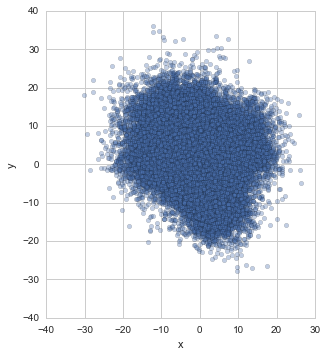

In [22]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots()
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)

## 1.4 Time Shift Comparison

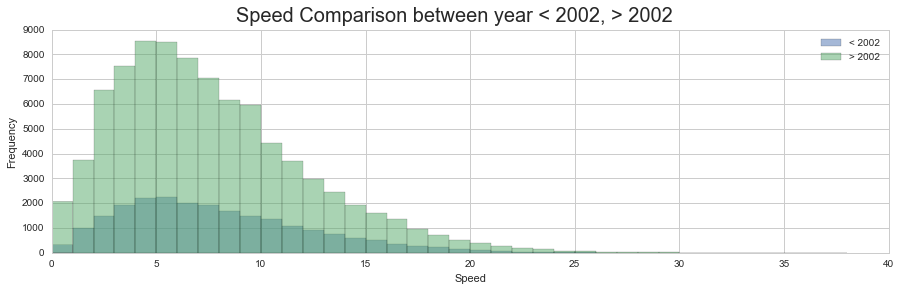

In [23]:
# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True)

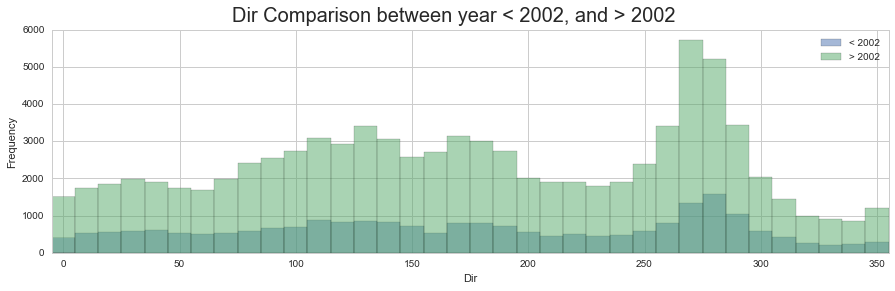

In [24]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt_configure(xlabel='Dir', ylabel='Frequency', legend=True)
plt.autoscale(enable=True, axis='x', tight=True)

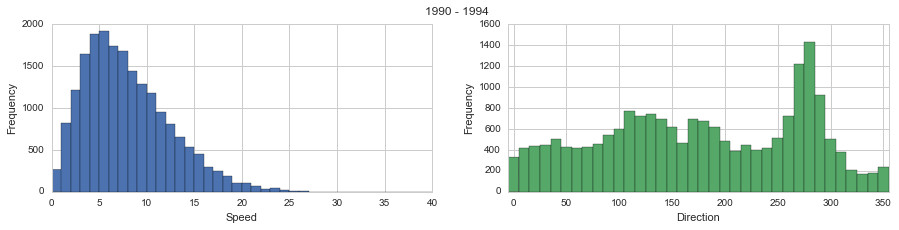

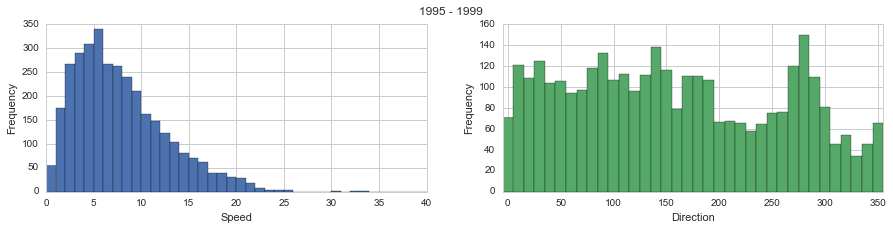

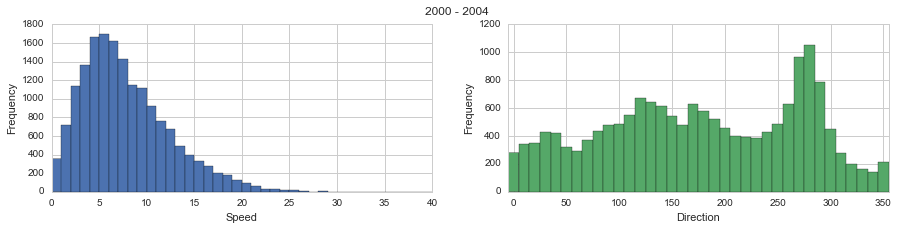

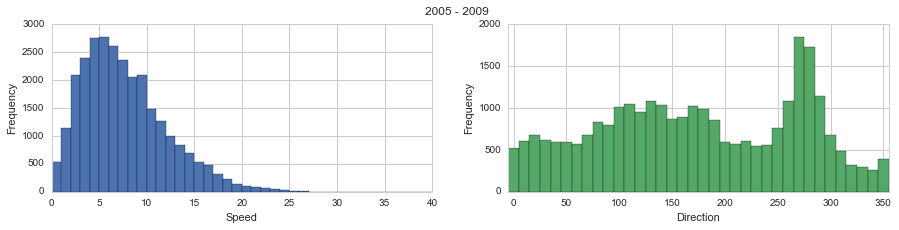

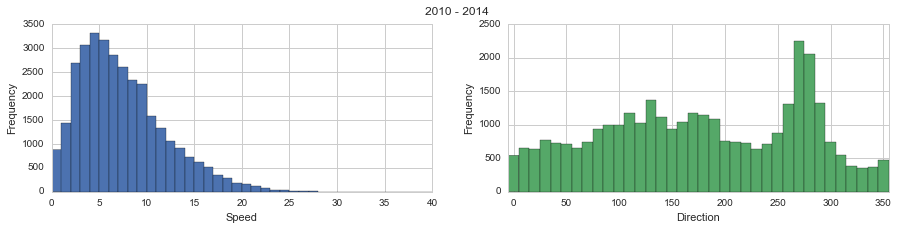

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = '%s - %s' %(start_time//10000, end_time//10000-1)
            plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir, title)
        
check_time_shift(df)

## 1.5 Re-select data, and overview of the clean dataset

In [26]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 20
Report type used: SAO
Sampling time used: 0


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,3.272100e+04,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000
mean,2.012260e+07,1181.809847,177.522536,7.463253,191.404297,0.761021,0.001161,-0.004584,-0.797977,0.354436
std,1.433008e+04,690.327277,93.724451,4.599341,102.906326,0.341678,2.188531,2.181967,5.549717,6.730083
min,2.010010e+07,0.000000,-4.998168,0.000000,0.000000,0.000000,-17.000000,-22.000000,-24.086076,-22.073215
25%,2.011060e+07,600.000000,103.035520,4.028808,110.000000,0.831535,-1.000000,-1.000000,-3.944124,-3.945957
50%,2.012110e+07,1100.000000,176.097258,6.621159,190.000000,0.913609,0.000000,0.000000,-0.547145,0.026374
75%,2.013123e+07,1700.000000,266.504780,9.957133,280.000000,0.963291,1.000000,1.000000,2.016993,4.263765
max,2.014123e+07,2300.000000,354.934726,37.948536,350.000000,0.997842,22.000000,18.000000,26.473371,35.939301


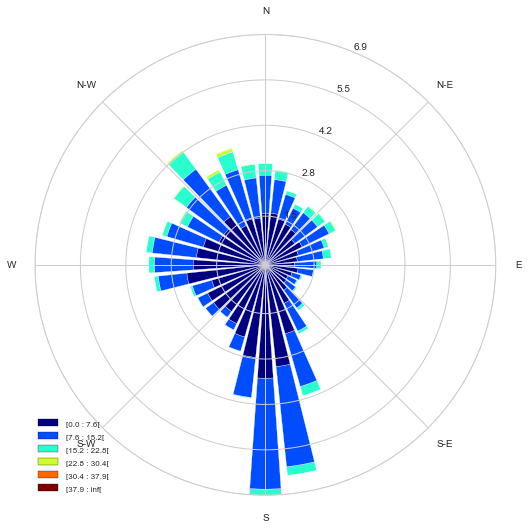

In [27]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

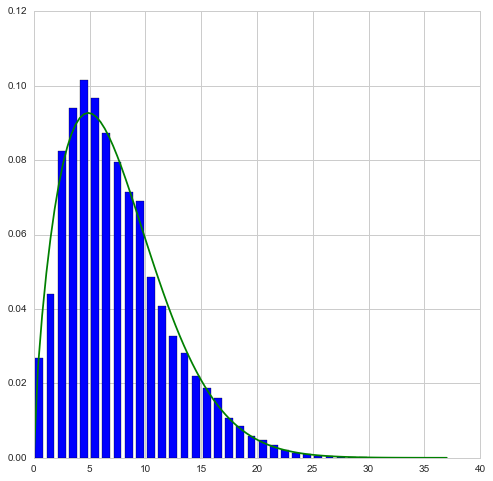

In [28]:
ax, _params = WindAxes.from_ax().pdf(df.speed, 
                                     bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

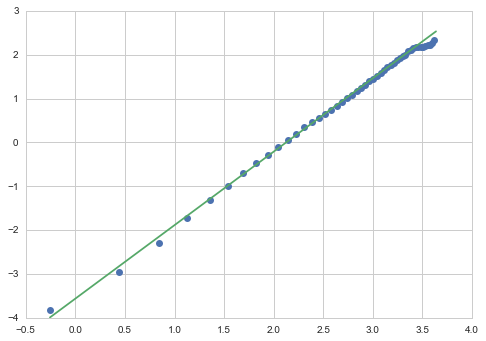

In [29]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-')

# 2. Create input data, i.e. speed_set

In [30]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [31]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print fitting_axis_range

for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.]


In [32]:
plot_limit = ceil(df['speed'].quantile(.975))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [33]:
sample = SPEED_SET

In [34]:
# The bandwidth value sometimes would be too radical
from sklearn.grid_search import GridSearchCV

if knot_unit:
    bandwidth_range = arange(0.5,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

grid = GridSearchCV(neighbors.KernelDensity(),
                    {'bandwidth': bandwidth_range},
                    n_jobs=-1, cv=4) 
grid.fit(sample)
bandwidth = grid.best_params_['bandwidth']

In [35]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH 

kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.1 1225
[  1.03984583e-06   1.46211585e-06   9.73086849e-07   5.90645526e-07
   8.31013475e-07]


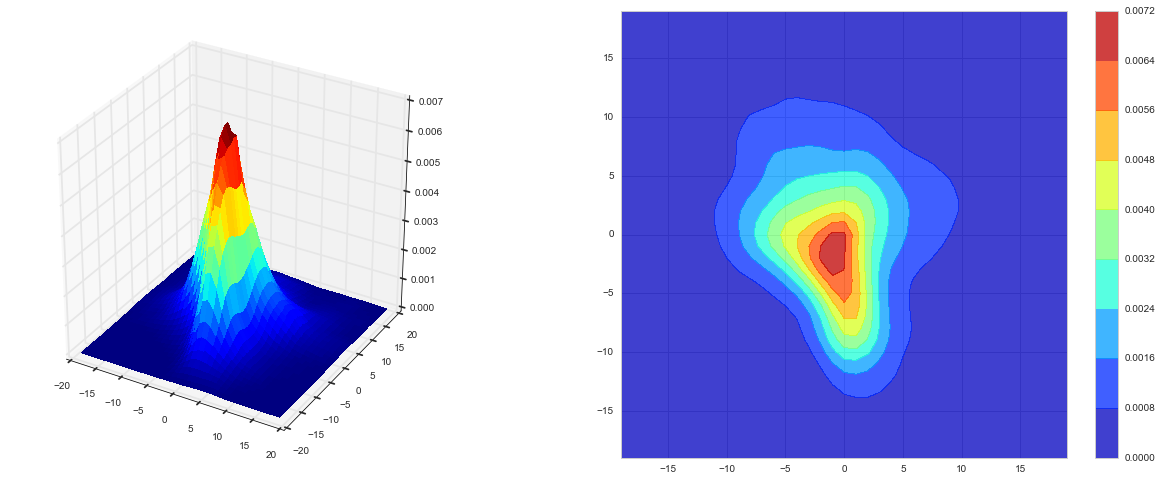

In [36]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [37]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [38]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [39]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.440,-0.487,-3.530,2.859,5.027,-0.483
2,0.303,-4.567,3.604,5.509,6.664,-0.192
3,0.257,3.119,3.183,6.153,5.861,0.011


GMM Plot Result
0.440322793512 [[-0.48693511 -3.53032904]] [ 2.39005777  5.26569283] -160.466308493
0.303047253761 [[-4.56732407  3.60358599]] [ 5.23656238  6.87990928] -157.442404524
0.256629952728 [[ 3.1194582   3.18303903]] [ 5.85690652  6.15651499] -83.6803479445


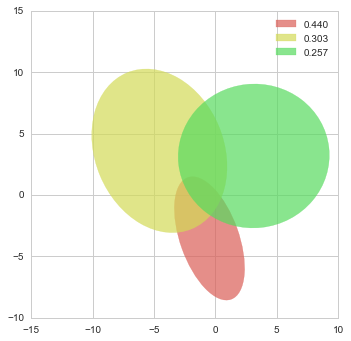

In [40]:
plot_gmm_ellipses(gmm_em_result)

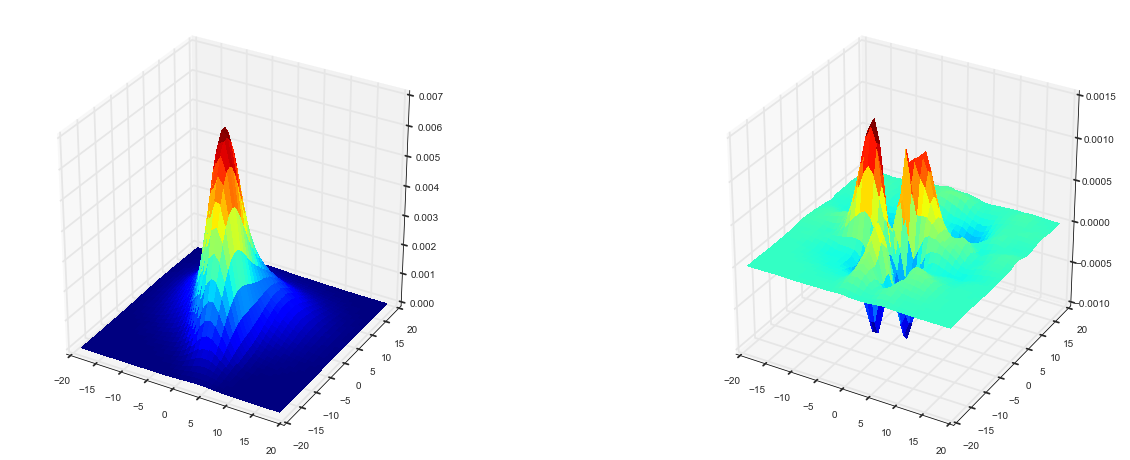

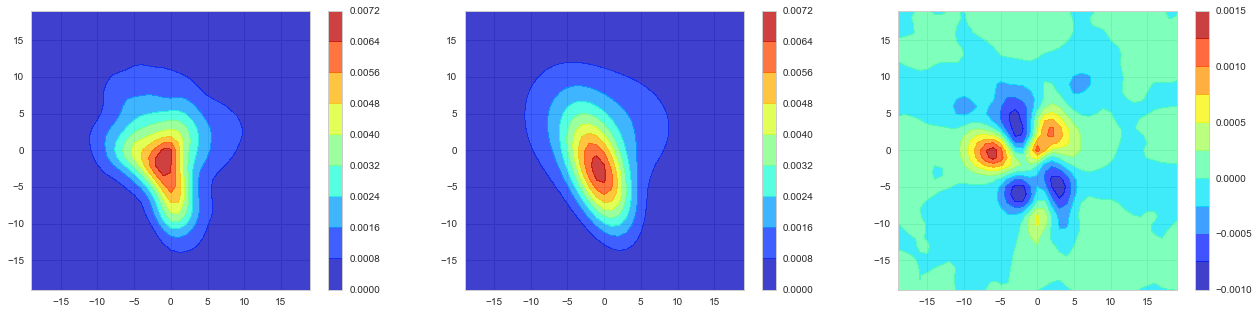

In [41]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

## Goodness-of-fit Statistics

In [42]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
# put into Pandas to make it looks better
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.051655,0.025335,6.105896e-08,0.035386,0.308862,0.961098


# 5. GMM by Optimization

In [43]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()

In [44]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -18.135155274959839
     jac: array([  1.78868175e+00,  -1.90734863e-06,   0.00000000e+00,
         7.15255737e-07,   4.76837158e-07,   2.14576721e-06,
         1.78869081e+00,   2.38418579e-07,   2.38418579e-07,
        -2.38418579e-07,  -2.38418579e-07,   2.86102295e-06,
         1.78868890e+00,   2.38418579e-07,   4.76837158e-07,
         0.00000000e+00,   7.15255737e-07,  -2.38418579e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 977
     nit: 48
    njev: 48
  status: 0
 success: True
       x: array([ 0.27009513,  0.108618  , -5.65530136,  2.22914102,  4.30361141,
       -0.37325746,  0.50417478, -0.82736365,  3.85103464,  7.19654579,
        6.37348386, -0.23077913,  0.22573009, -2.45753775, -0.05984862,
        4.2231478 ,  2.77621364,  0.16791379])

## 5.1 GMM Result

In [45]:
# gmm = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.504,-0.827,3.851,7.197,6.373,-0.231
2,0.270,0.109,-5.655,2.229,4.304,-0.373
3,0.226,-2.458,-0.060,4.223,2.776,0.168


GMM Plot Result
0.504174778387 [[-0.82736365  3.85103464]] [ 5.85130928  7.62717166] -121.092452043
0.270095132598 [[ 0.108618   -5.65530136]] [ 2.02017626  4.40556792] -166.072846234
0.225730089015 [[-2.45753775 -0.05984862]] [ 2.70889941  4.26663843] -79.3775812142


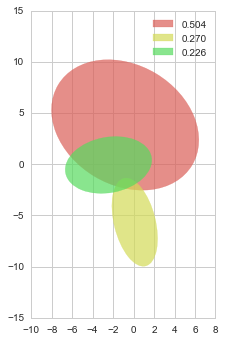

In [46]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit statistics

In [47]:
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.035317,0.011276,1.330461e-08,0.016518,0.144175,0.991523


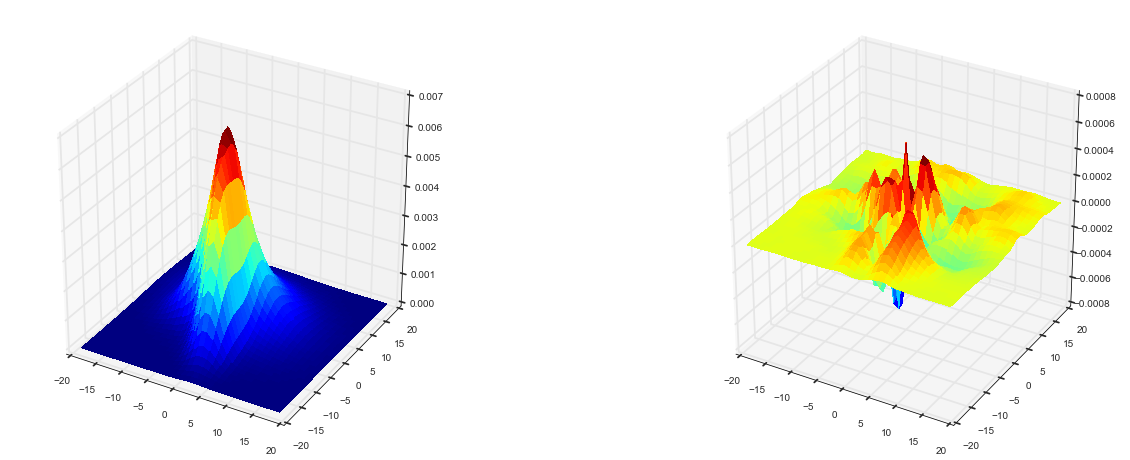

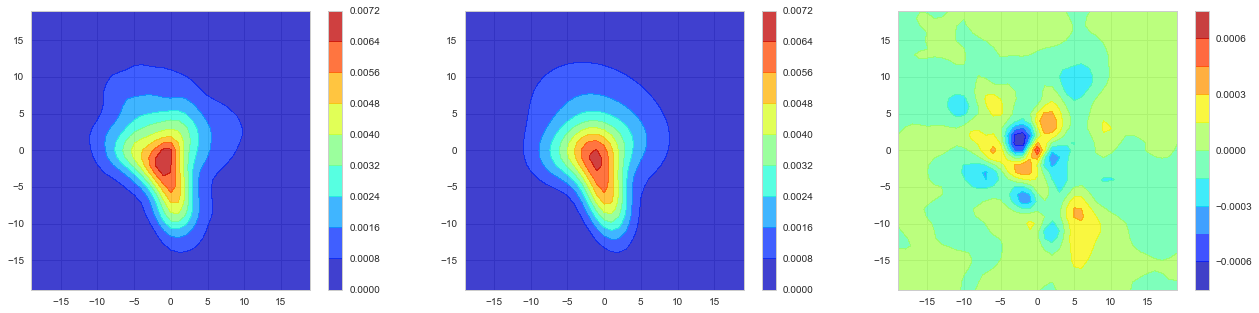

In [48]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

In [49]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

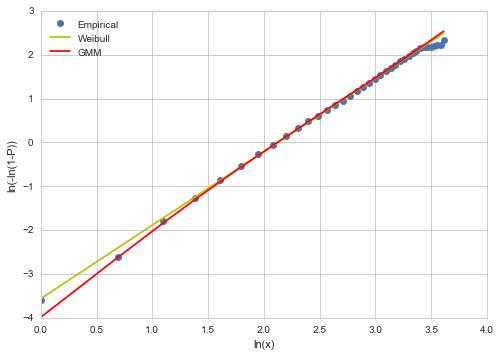

In [50]:
x = arange(0, max_speed)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-', color = 'y', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(zip(*y_)[0])
plt.plot(log(x), log(-log(1-y)),'-', color = 'r', label = 'GMM')

plt_configure(xlabel='ln(x)',ylabel='ln(-ln(1-P))',
             legend={'loc':'best'})

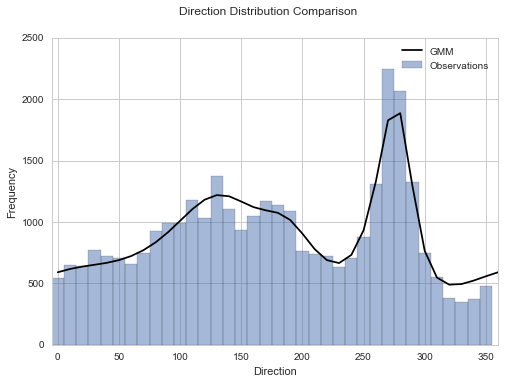

In [51]:
# Calculate Angle Distribution
x_vals = linspace(0,2*pi, num=36+1)
y_vals_ =[integrate.nquad(f, [[0, inf],[x_val-pi/36, x_val+pi/36]]) for x_val in x_vals]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y_vals = array(zip(*y_vals_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Observations')

plt.plot(x_vals/pi*180, y_vals,'-', color='black', label='GMM')
plt_configure(title='Direction Distribution Comparison',
              xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight')

(0, 3500.0)

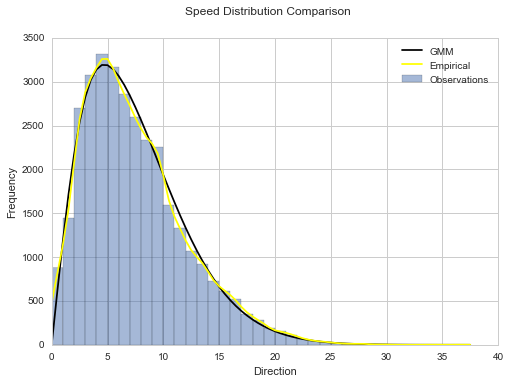

In [52]:
# Calculate Speed Distribution
# 1. GMM Model
x_vals = arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.01, x_val+0.01],[0, 2*pi]]) for x_val in x_vals]
y_vals = array(zip(*y_vals_)[0])*len(df.speed)/0.02
plt.plot(x_vals, y_vals,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Observations')

# 3. 1d KDE
sample = array(df.speed).reshape(-1, 1)
kde_temp = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(kde_temp.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label='Empirical')

plt_configure(title='Speed Distribution Comparison',
              xlabel='Direction',ylabel='Frequency',legend=True)
plt.gca().set_ylim(bottom = 0)

## 5.3 Sectoral Comaprison

In [53]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, 
                                         [[0, inf],
                                          [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        
        # 1. Frequency Comparison
        # 1.1. Data Histogram
        fig = plt.figure(figsize=(22,4))
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_df.speed.max()), alpha=0.5)
        
        # 1.2. Model Distribution
        x_vals = linspace(0, sub_max_speed, 20)
        y_vals_ =[integrate.nquad(f, 
                  [[x_val-0.1, x_val+0.1],
                   [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                  for x_val in x_vals]
        y_vals = array(zip(*y_vals_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plt.plot(x_vals, y_vals,'-', color='black')
        
        plt_configure(xlabel = "V", ylabel='Frequency')
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        x = linspace(0, max_speed, 20)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_cdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, 
                             [[0, x_val],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_gmm = array(zip(*y_)[0])/direction_prob[0]
        plt.plot(x, y_cdf,'o')
        plt.plot(x, y_gmm,'-', color='red')
        plt_configure(xlabel = "V", ylabel='P')
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plt.plot(log(x), log(-log(1-y_cdf)),'o')
        plt.plot(log(x), log(-log(1-y_gmm)),'-', color='red')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)")
        
        title = '%s (%s - %s) Degree' % (angle, start_angle, end_angle)
        plt.suptitle(title)
        
        diff = abs(y_cdf - y_gmm)
        max_diff_array.append([angle, diff.max(), x[diff.argmax()]])
        
        plt.show()
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_gmm[diff.argmax()]
    return max_diff_array

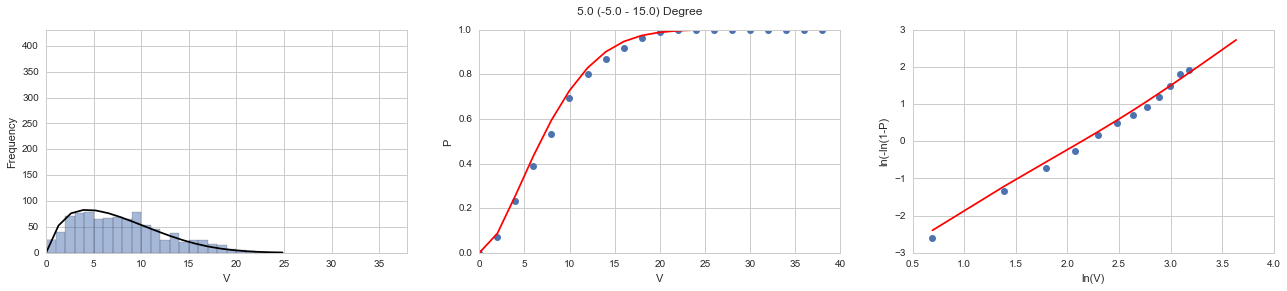

data size: 921
max diff: 0.0603477510739 , speed value: 7.98916536942 y gmm 0.594549705471


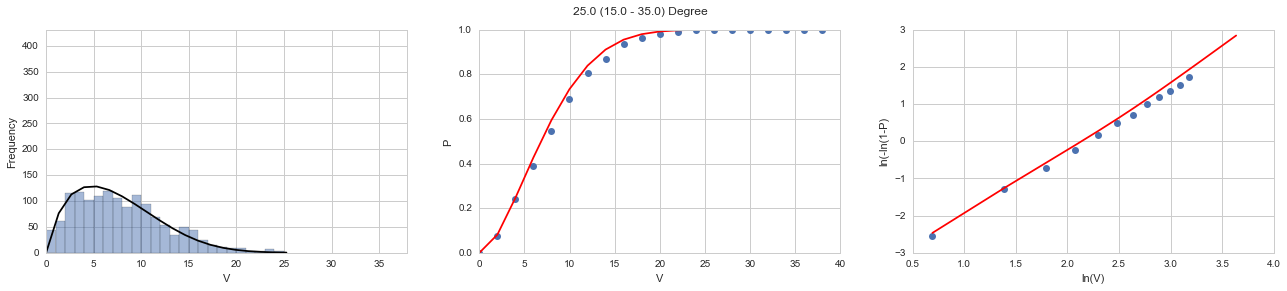

data size: 1411
max diff: 0.0474125467253 , speed value: 7.98916536942 y gmm 0.594542241977


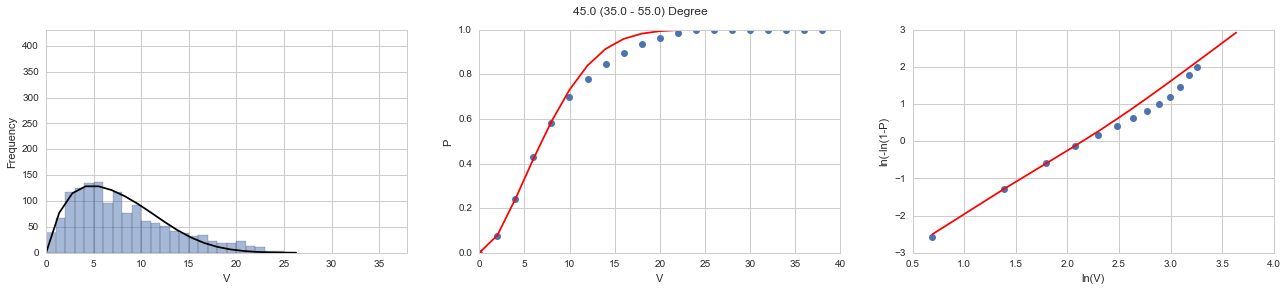

data size: 1434
max diff: 0.0689442852135 , speed value: 13.9810393965 y gmm 0.913435219663


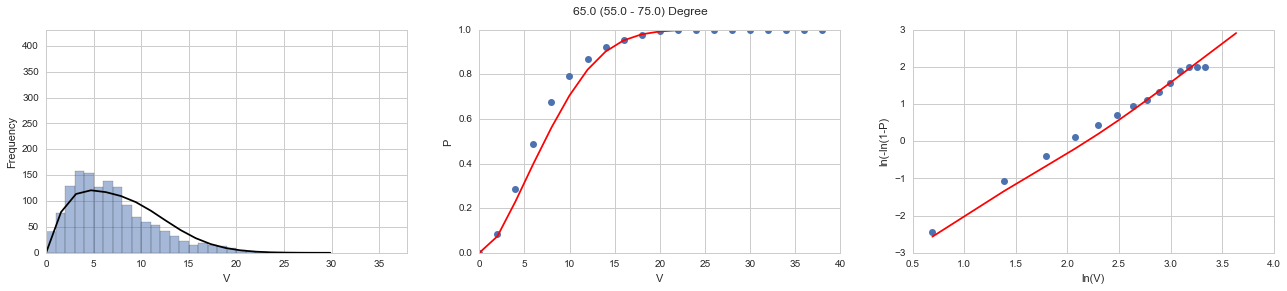

data size: 1411
max diff: 0.1135108904 , speed value: 7.98916536942 y gmm 0.561187904781


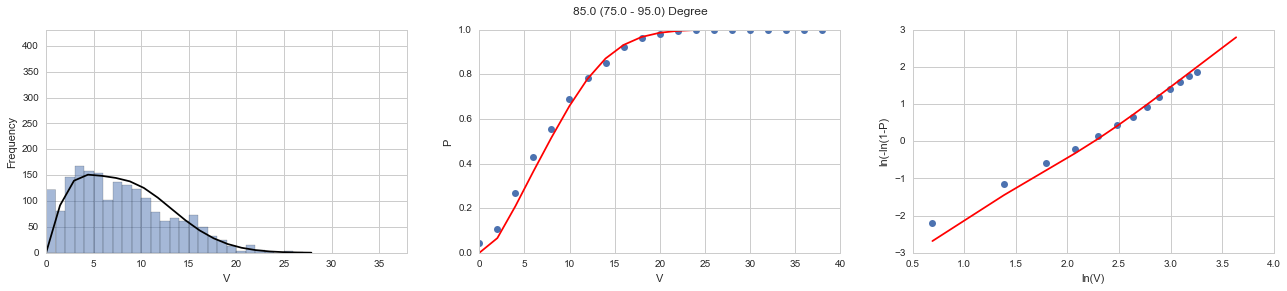

data size: 1923
max diff: 0.0644119281113 , speed value: 5.99187402706 y gmm 0.365125253376


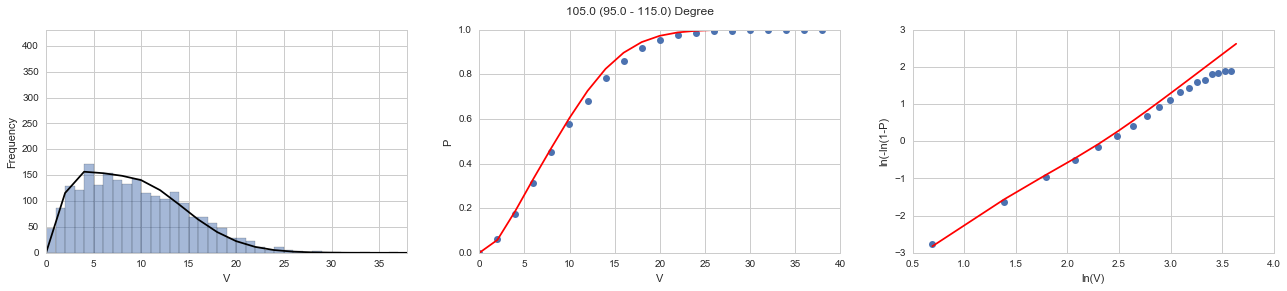

data size: 2176
max diff: 0.0455232351363 , speed value: 11.9837480541 y gmm 0.725210735136


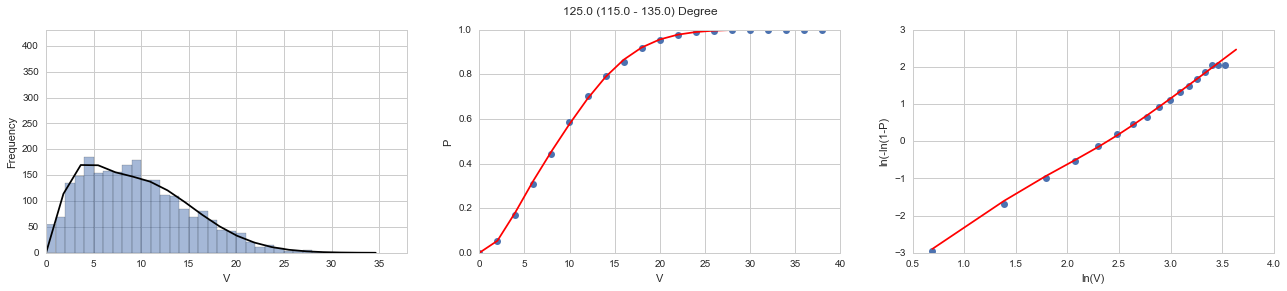

data size: 2411
max diff: 0.0140064476971 , speed value: 7.98916536942 y gmm 0.45448757586


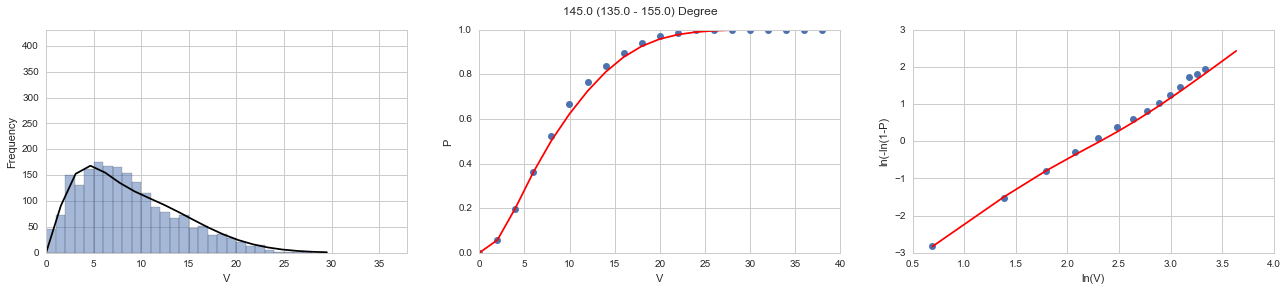

data size: 2046
max diff: 0.043874477897 , speed value: 9.98645671177 y gmm 0.622303430216


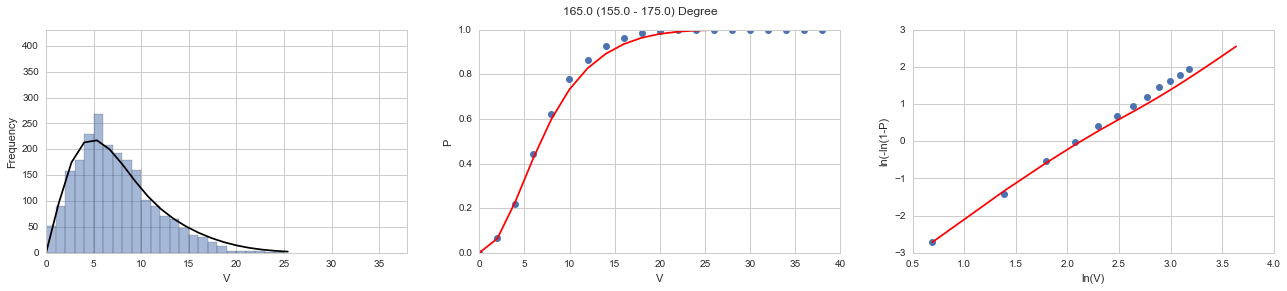

data size: 2216
max diff: 0.0440539474303 , speed value: 9.98645671177 y gmm 0.732570601306


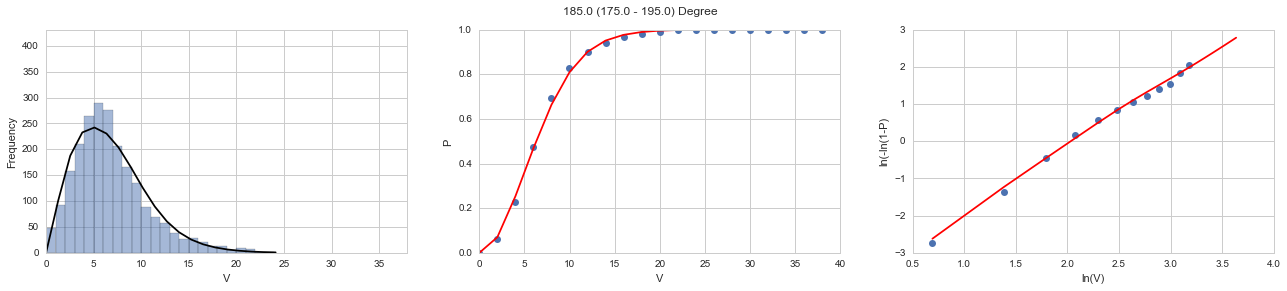

data size: 2229
max diff: 0.0298775559208 , speed value: 7.98916536942 y gmm 0.663258379476


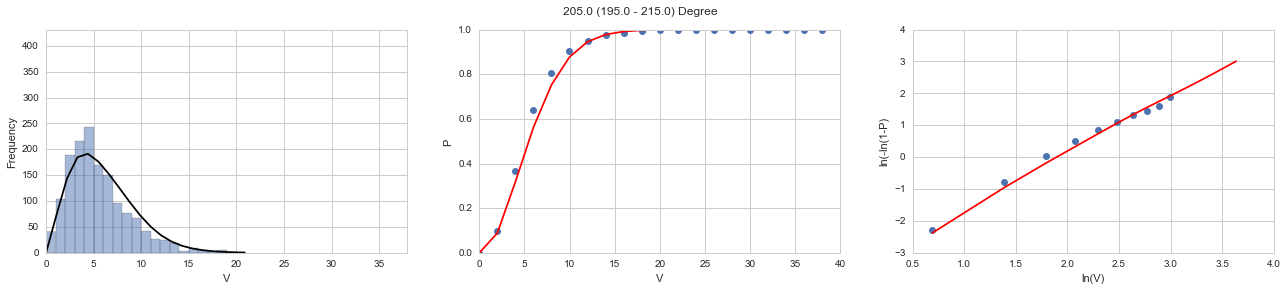

data size: 1499
max diff: 0.0796435956915 , speed value: 5.99187402706 y gmm 0.562117578425


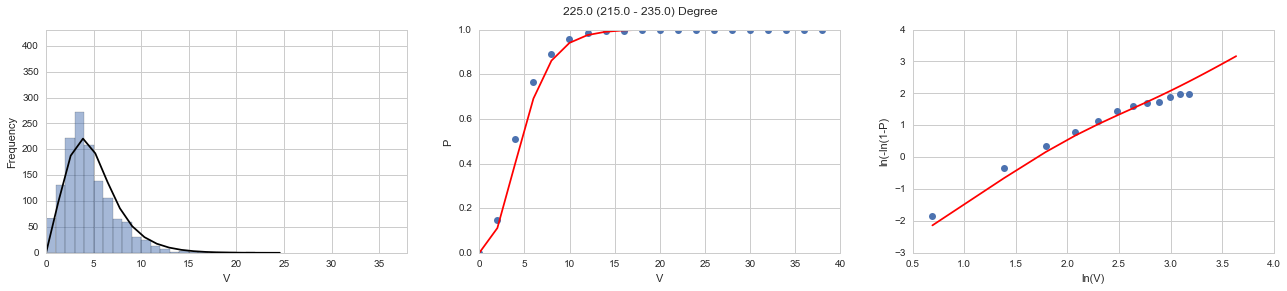

data size: 1359
max diff: 0.104135754635 , speed value: 3.99458268471 y gmm 0.403590514681


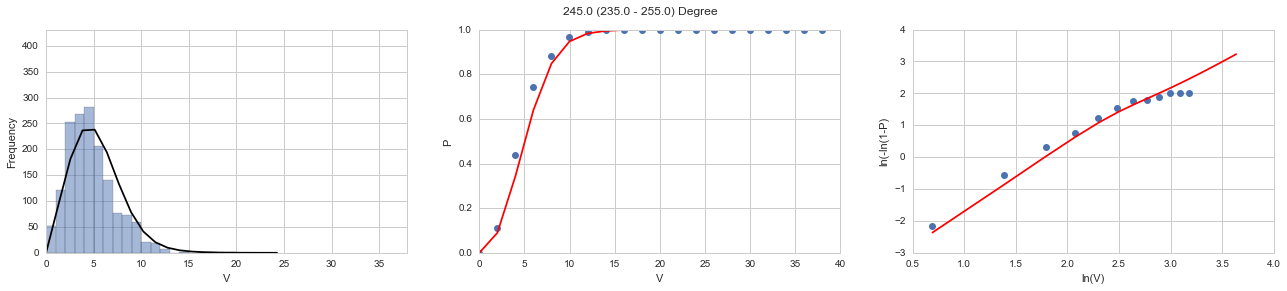

data size: 1585
max diff: 0.104682959554 , speed value: 5.99187402706 y gmm 0.639796535715


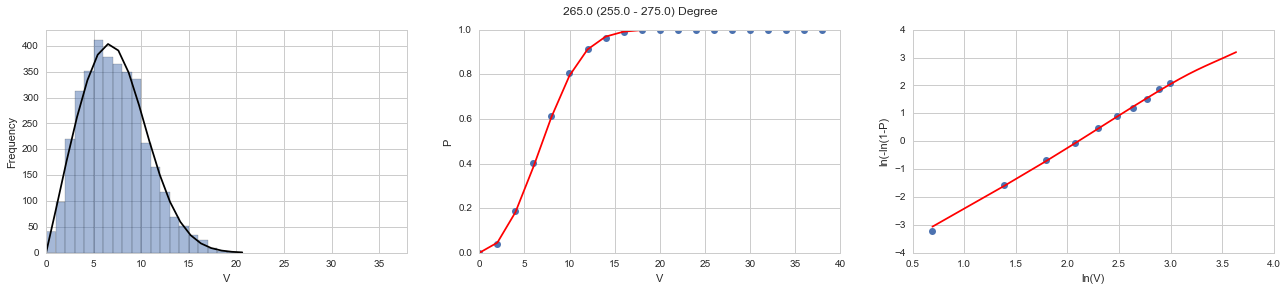

data size: 3556
max diff: 0.0180341281766 , speed value: 5.99187402706 y gmm 0.385227964062


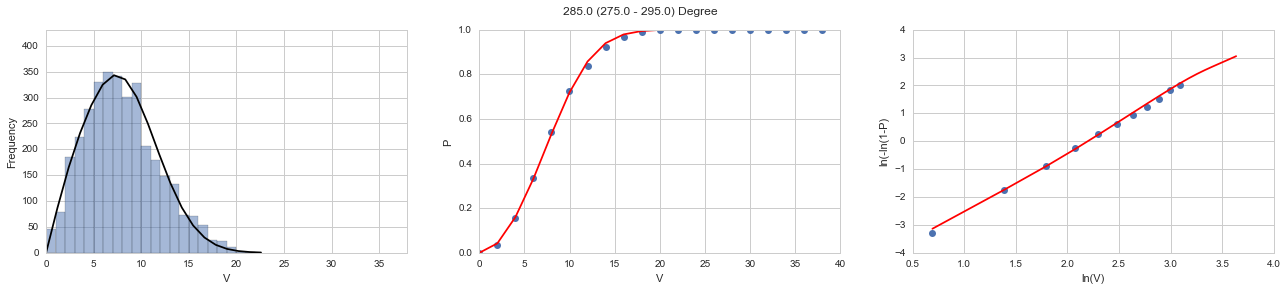

data size: 3393
max diff: 0.0184611653174 , speed value: 11.9837480541 y gmm 0.856952176222


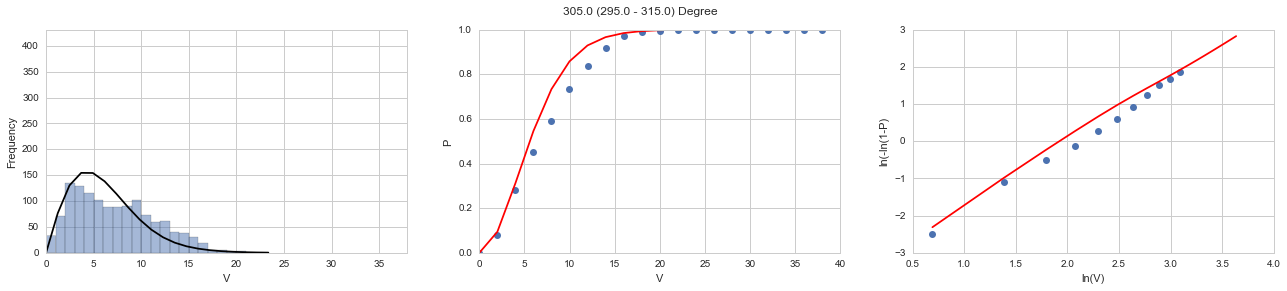

data size: 1298
max diff: 0.144644664273 , speed value: 7.98916536942 y gmm 0.733242507108


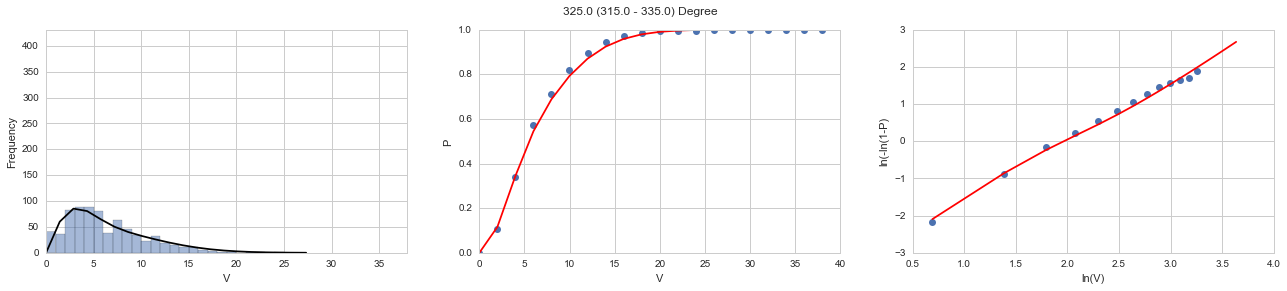

data size: 731
max diff: 0.028311148016 , speed value: 9.98645671177 y gmm 0.792482285637


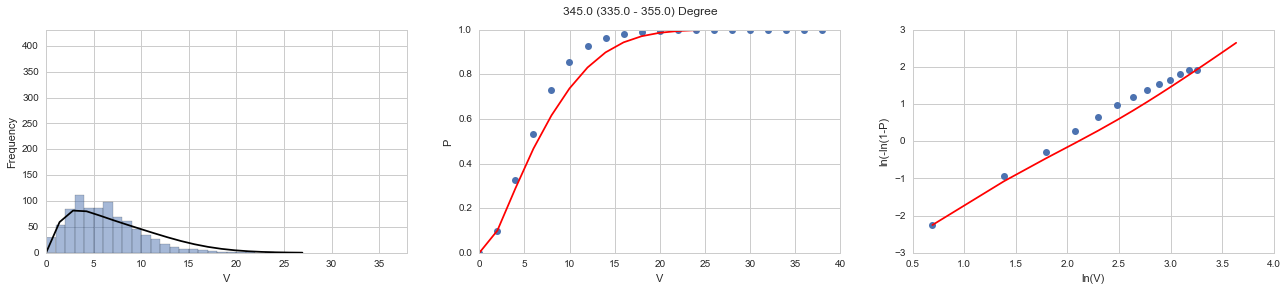

data size: 852
max diff: 0.116843004463 , speed value: 9.98645671177 y gmm 0.736443380514


In [54]:
if len(effective_column) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

### 5.3.1 Variability over the years

(0, 0.14000000000000001)

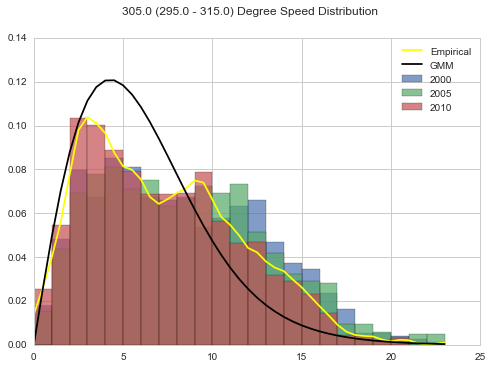

In [55]:
max_diff_element = max(max_diff_array, key=lambda x: x[1])
angle =  max_diff_angle = max_diff_element[0]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label='Empirical')

# 2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.02
plt.plot(x_vals, y_vals,'-', color='black', label = 'GMM')

for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), 
                                              normed=True,alpha=0.7,
                                              label = str(int(start_time/10000)))

plt_configure(title='%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle),
              legend=True)
plt.gca().set_ylim(bottom = 0)

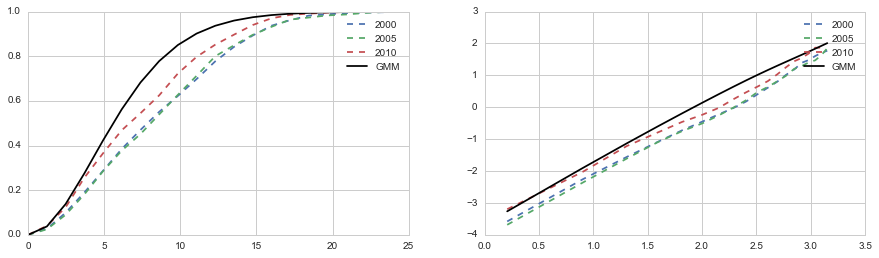

In [56]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        sample = df_other_years_at_angle.speed
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)

        ax1 = fig.add_subplot(1,2,1) 
        plt.plot(x, y_cdf,'--', label = str(int(start_time/10000)))

        ax3 = fig.add_subplot(1,2,2) 
        plt.plot(log(x), log(-log(1-y_cdf)),'--', label = str(int(start_time/10000)))
       
y_ =[integrate.nquad(f, 
                     [[0, x_val],
                      [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, 
                                 [[0, inf],
                                  [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color='black', label='GMM')
plt.legend()

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color='black',label='GMM')
plt.legend()

### 5.3.2 Bootstrap, to see the variability of each sector

(0, 90.0)

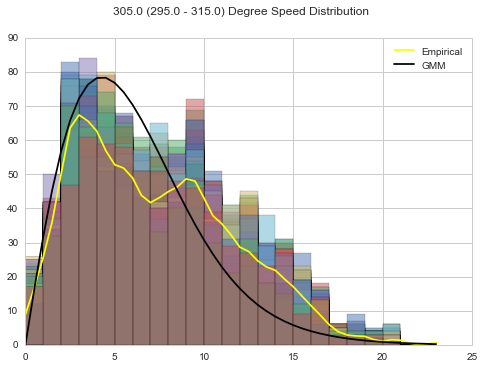

In [57]:
FRACTION = 0.5 

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))*len(sub_df.speed)*FRACTION
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label='Empirical')

#2. GMM
y_vals_ =[integrate.nquad(f, 
                          [[x_val-0.01, x_val+0.01],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, 
                                 [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.02 *len(sub_df.speed)*FRACTION
plt.plot(x_vals, y_vals,'-', color='black', label='GMM')

bins = arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5)

plt_configure(title='%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle), 
              legend=True)
plt.gca().set_ylim(bottom = 0)

0.155841298106 8.60658738018 0.778337446026


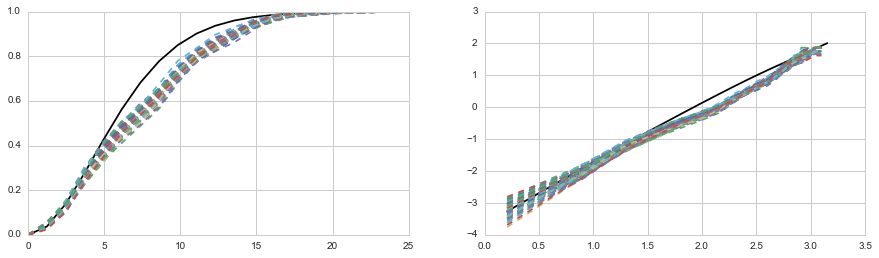

In [58]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black')

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    ax1 = fig.add_subplot(1,2,1) 
    plt.plot(x, y_cdf,'--')

    ax3 = fig.add_subplot(1,2,2) 
    plt.plot(log(x), log(-log(1-y_cdf)),'--')
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Variability of results & Cross-Validation

In [59]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
    
points = FITTING_RANGE
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error'):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.523,-0.926,3.743,7.164,6.193,-0.222
2,0.270,0.125,-5.659,2.173,4.379,-0.347
3,0.207,-2.441,-0.289,4.067,2.626,0.188


GMM Plot Result
0.522576553079 [[-0.92624716  3.74341304]] [ 5.74729178  7.52674794] -118.337651797
0.270217685023 [[ 0.12524319 -5.65933111]] [ 2.00099811  4.46010983] -167.724469385
0.207205761898 [[-2.4413716  -0.28877573]] [ 2.54814184  4.11630028] -78.6796674554


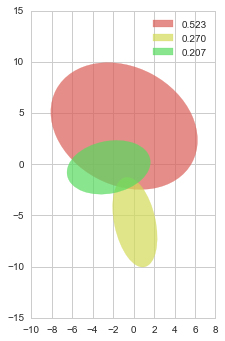

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.037721,0.012066,1.469728e-08,0.016812,0.151538,0.990736


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.504,-0.778,3.854,7.131,6.190,-0.213
2,0.281,0.084,-5.615,2.222,4.304,-0.371
3,0.215,-2.498,-0.247,4.251,2.621,0.127


GMM Plot Result
0.504064711198 [[-0.77765778  3.85430162]] [ 5.76933446  7.47548177] -118.166473402
0.281304417368 [[ 0.08385074 -5.61512031]] [ 2.01715363  4.40421357] -166.215780937
0.214630871433 [[-2.49844989 -0.24695016]] [ 2.58690702  4.27122806] -82.9277768499


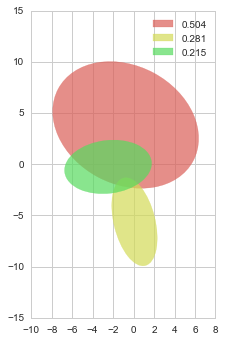

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.043177,0.012246,1.418688e-08,0.016531,0.148798,0.991218


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.484,-0.756,4.133,7.410,6.324,-0.240
2,0.280,0.104,-5.586,2.261,4.290,-0.368
3,0.236,-2.515,-0.047,4.232,2.848,0.137


GMM Plot Result
0.484208139347 [[-0.75560178  4.13283499]] [ 5.82909533  7.80599119] -118.202767667
0.280169582775 [[ 0.10369188 -5.58608282]] [ 2.05295191  4.39339816] -165.870135836
0.235622277878 [[-2.51458438 -0.04685246]] [ 2.80033994  4.26327087] -80.71038557


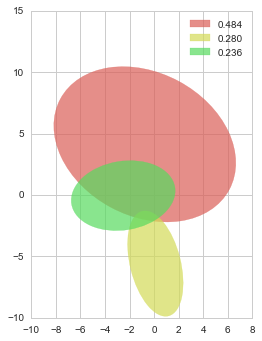

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.036531,0.011487,1.378152e-08,0.016936,0.147009,0.991256


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.500,-0.709,3.920,7.201,6.283,-0.251
2,0.283,0.079,-5.439,2.244,4.428,-0.372
3,0.217,-2.637,-0.077,4.259,2.772,0.149


GMM Plot Result
0.500474786701 [[-0.70939109  3.9198246 ]] [ 5.72046293  7.65542427] -120.716853665
0.28262696688 [[ 0.07872083 -5.43856872]] [ 2.03727371  4.52723396] -166.532584948
0.216898246419 [[-2.63651228 -0.07722876]] [ 2.71972579  4.29260154] -80.7044092568


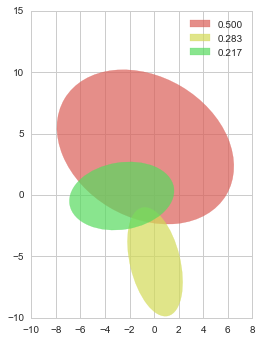

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.046335,0.013266,1.461149e-08,0.017,0.151063,0.990744


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.492,-0.795,3.798,7.178,6.575,-0.241
2,0.268,0.081,-5.583,2.189,4.328,-0.361
3,0.239,-2.401,0.111,4.326,2.846,0.175


GMM Plot Result
0.492176811487 [[-0.79517098  3.79794897]] [ 5.9406739   7.71118344] -124.969631216
0.268488212663 [[ 0.08124999 -5.58339095]] [ 1.99996651  4.41857896] -166.941061769
0.239334975851 [[-2.40073323  0.11080083]] [ 2.77068822  4.37452683] -78.9514105405


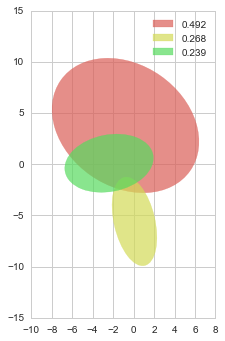

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.033219,0.011221,1.320675e-08,0.016547,0.143737,0.991676


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.511,-0.867,3.826,7.076,6.330,-0.217
2,0.261,0.142,-5.744,2.216,4.260,-0.366
3,0.228,-2.350,-0.156,4.175,2.756,0.201


GMM Plot Result
0.51123118594 [[-0.86702561  3.82565407]] [ 5.84155984  7.48451244] -121.405694504
0.261030023383 [[ 0.14223765 -5.74392298]] [ 2.01518593  4.35800016] -166.207745035
0.227738790676 [[-2.34953166 -0.15586546]] [ 2.66062465  4.23592835] -77.4216570319


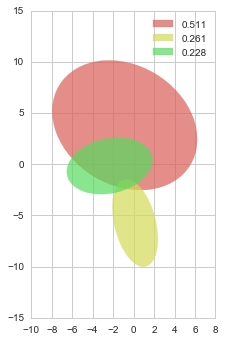

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.041062,0.012108,1.726964e-08,0.018625,0.164282,0.989059


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.498,-0.984,3.916,7.250,6.419,-0.207
2,0.277,0.080,-5.517,2.236,4.262,-0.364
3,0.225,-2.385,-0.085,4.179,2.763,0.209


GMM Plot Result
0.498193425797 [[-0.98403922  3.91612418]] [ 5.97335024  7.62156531] -119.756123221
0.276906659601 [[ 0.08017756 -5.51732441]] [ 2.03596435  4.36160662] -166.115268388
0.224899914602 [[-2.38498235 -0.08539059]] [ 2.65965384  4.24560693] -76.8980775229


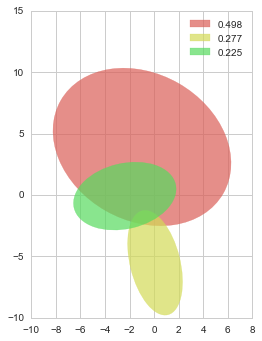

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.038276,0.011745,1.622360e-08,0.017679,0.159304,0.989908


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.509,-0.854,3.920,7.040,6.494,-0.242
2,0.267,0.133,-5.684,2.233,4.330,-0.389
3,0.224,-2.576,-0.020,4.338,2.782,0.192


GMM Plot Result
0.509078977284 [[-0.85444293  3.91965475]] [ 5.84792769  7.58580236] -125.773809531
0.266944711106 [[ 0.13278812 -5.68359086]] [ 2.0060933   4.43976516] -165.673130095
0.22397631161 [[-2.57604563 -0.01988532]] [ 2.69646823  4.39144452] -78.6405098849


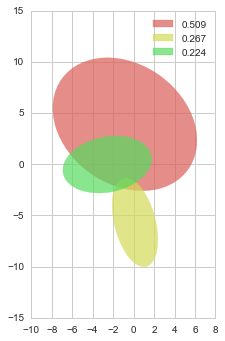

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.037754,0.011293,1.479798e-08,0.017673,0.152092,0.990374


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.518,-0.938,3.789,7.267,6.392,-0.220
2,0.265,0.110,-5.778,2.201,4.359,-0.386
3,0.217,-2.323,-0.136,4.174,2.769,0.166


GMM Plot Result
0.517950769943 [[-0.93786109  3.78880585]] [ 5.91659244  7.65896567] -119.810984596
0.265097012988 [[ 0.10993132 -5.77756933]] [ 1.98381727  4.46199218] -166.202251416
0.216952217069 [[-2.32314209 -0.13620941]] [ 2.70221027  4.21747294] -79.2382411743


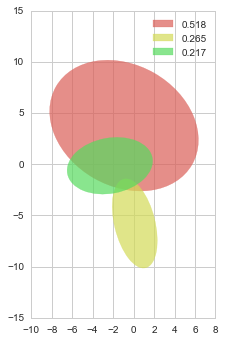

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.036325,0.013362,1.483876e-08,0.017426,0.152457,0.990338


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.495,-0.861,3.852,7.164,6.433,-0.233
2,0.272,0.100,-5.630,2.259,4.310,-0.398
3,0.233,-2.272,0.074,4.357,2.831,0.215


GMM Plot Result
0.495434244684 [[-0.86137094  3.85159665]] [ 5.87351825  7.62904348] -122.607555839
0.271555479186 [[ 0.09978048 -5.62998783]] [ 2.01647258  4.4283567 ] -165.042646476
0.23301027613 [[-2.27202807  0.07365622]] [ 2.72126742  4.42631019] -77.098728559


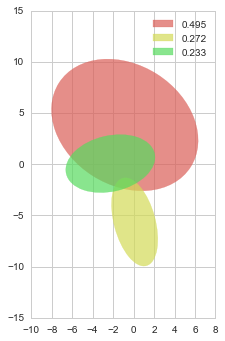

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.040394,0.011484,1.542839e-08,0.017753,0.155271,0.990221


In [60]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, NUMBER_OF_GAUSSIAN, fit_method = FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    pretty_pd_display([goodness_of_fit_summary(result['gmm_pdf_result'], result['kde_result'])])

## 6.2 Cross-validation, to select the number of Gaussian

In [61]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 24540.75 8180.25
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.262490,0.083167,2.680820e-07,0.074083,0.646579,0.829284
1,0.263047,0.083534,2.673290e-07,0.073792,0.646241,0.830072
2,0.250880,0.083511,2.652569e-07,0.074136,0.643791,0.831026
3,0.259407,0.083559,2.652898e-07,0.073022,0.644386,0.830706


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.285643,0.074347,2.472032e-07,0.070671,0.623192,0.842945
1,0.251190,0.089306,2.803526e-07,0.074716,0.661902,0.820948
2,0.291239,0.084920,2.741316e-07,0.072587,0.654337,0.825980
3,0.258047,0.085199,2.827778e-07,0.078146,0.662864,0.821363


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.118652,0.046115,4.487880e-08,0.030113,0.264716,0.971649
1,0.124486,0.046653,4.430150e-08,0.030315,0.263045,0.971645
2,0.126453,0.048559,4.684975e-08,0.031066,0.270559,0.970104
3,0.137046,0.048079,4.435636e-08,0.030101,0.263357,0.971699


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.150651,0.054176,4.989659e-08,0.032720,0.279455,0.967476
1,0.135694,0.046970,5.183216e-08,0.031995,0.284703,0.967524
2,0.129176,0.044107,4.415276e-08,0.029766,0.262611,0.972087
3,0.129146,0.048360,5.059076e-08,0.032258,0.280795,0.967987


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.037360,0.010347,1.319836e-08,0.016563,0.143594,0.991529
1,0.036824,0.011567,1.356520e-08,0.016398,0.145597,0.991470
2,0.033698,0.011040,1.301695e-08,0.016218,0.142610,0.991723
3,0.037860,0.012086,1.467008e-08,0.017393,0.151377,0.990592


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.032434,0.012426,2.080714e-08,0.019647,0.180315,0.987079
1,0.050633,0.019314,1.968450e-08,0.020825,0.175306,0.986991
2,0.057810,0.014129,2.139949e-08,0.020973,0.182839,0.986341
3,0.043997,0.013095,1.677322e-08,0.017964,0.161933,0.989563


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.076514,0.007849,9.575504e-09,0.013768,0.122317,0.993988
1,0.096582,0.008310,9.908099e-09,0.014275,0.124420,0.993714
2,0.075713,0.006495,7.206031e-09,0.012176,0.106096,0.995401
3,0.064335,0.008333,7.979279e-09,0.012821,0.111656,0.994834


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.104808,0.017559,1.593070e-08,0.018630,0.157744,0.989444
1,0.060001,0.013723,1.171115e-08,0.015189,0.135260,0.992473
2,0.130756,0.012665,1.921826e-08,0.019231,0.173323,0.987863
3,0.064248,0.015086,1.800304e-08,0.018898,0.167698,0.989096


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.019810,0.005368,6.165530e-09,0.011386,0.098045,0.996041
1,0.019000,0.006945,5.440811e-09,0.010482,0.092319,0.996536
2,0.022241,0.007604,5.732534e-09,0.010858,0.094570,0.996378
3,0.019541,0.006757,6.415763e-09,0.011289,0.100162,0.995913


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.044220,0.010015,9.787406e-09,0.013437,0.124044,0.993926
1,0.026068,0.012082,1.548980e-08,0.017629,0.154955,0.990161
2,0.030433,0.013397,1.286407e-08,0.016145,0.142070,0.991626
3,0.026656,0.007796,1.101722e-08,0.015614,0.131027,0.993006


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.013880,0.008769,3.300515e-09,0.008209,0.071790,0.997893
1,0.013967,0.005989,2.811436e-09,0.007467,0.066299,0.998215
2,0.013006,0.007047,2.991312e-09,0.007813,0.068356,0.998102
3,0.014292,0.007775,3.019977e-09,0.007948,0.068690,0.998068


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.021698,0.013684,1.079441e-08,0.014864,0.129971,0.993195
1,0.025051,0.014647,1.292494e-08,0.016635,0.141950,0.991726
2,0.024170,0.012866,1.166173e-08,0.015372,0.135019,0.992513
3,0.030169,0.010907,7.650291e-09,0.011891,0.109323,0.995196


In [62]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.258956,0.083443,2.664894e-07,0.073758,0.645249,0.830272
1,0.126659,0.047351,4.509660e-08,0.030398,0.265419,0.971274
2,0.036436,0.011260,1.361265e-08,0.016643,0.145795,0.991328
3,0.078286,0.007747,8.667228e-09,0.013260,0.116123,0.994484
4,0.020148,0.006668,5.938660e-09,0.011004,0.096274,0.996217
5,0.013786,0.007395,3.030810e-09,0.007859,0.068784,0.998069


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.271530,0.083443,2.711163e-07,0.074030,0.650574,0.827809
1,0.136167,0.048403,4.911807e-08,0.031685,0.276891,0.968769
2,0.046218,0.014741,1.966609e-08,0.019852,0.175098,0.987494
3,0.089953,0.014758,1.621579e-08,0.017987,0.158506,0.989719
4,0.031844,0.010823,1.228963e-08,0.015706,0.138024,0.992179
5,0.025272,0.013026,1.075784e-08,0.014690,0.129066,0.993157


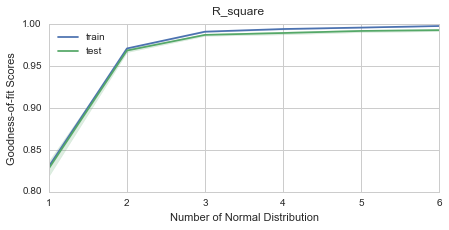

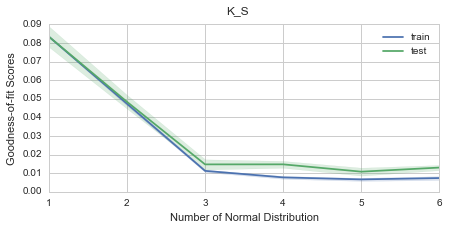

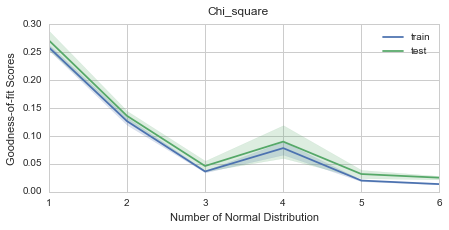

In [63]:
prop_cycle=sns.color_palette()
for column in ['R_square','K_S','Chi_square', ]:
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 3)
    plt.plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plt.plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.suptitle(column)
    plt.xticks(gaussian_number_range)
    plt.gca().set(xlabel='Number of Normal Distribution', ylabel='Goodness-of-fit Scores')
    plt.legend(loc='best')
    plt.show()

In [64]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)

## 6.3 Variability of KDE

In [65]:
sss

NameError: name 'sss' is not defined

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        